In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_excel('pima-data.xlsx')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True


In [3]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

In [4]:
df.shape

(768, 12)

In [5]:
# its a classification problem 

In [6]:
df = df.drop('has_diabetes', axis= 1)
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True


In [7]:
df.dtypes

num_preg           int64
glucose_conc       int64
diastolic_bp       int64
thickness          int64
insulin            int64
bmi              float64
diab_pred        float64
age                int64
diabetes_orig      int64
skin             float64
diabetes            bool
dtype: object

In [8]:
mapdict = {True: 1,
          False: 0}

In [9]:
df['diabetes'] = df['diabetes'].map(mapdict)

In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,1


In [11]:
def cleaninsulin(x):
    if x == 0:
        return df['insulin'].median()
    else:
        return x

In [12]:
df['insulin'] = df['insulin'].apply(cleaninsulin)
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,diabetes
0,6,148,72,35,30.5,33.6,0.627,50,1,1.3790,1
1,1,85,66,29,30.5,26.6,0.351,31,0,1.1426,0
2,8,183,64,0,30.5,23.3,0.672,32,1,0.0000,1
3,1,89,66,23,94.0,28.1,0.167,21,0,0.9062,0
4,0,137,40,35,168.0,43.1,2.288,33,1,1.3790,1


In [13]:
#correlated
# if one column value is increasing another column as increasing we  will call as +ve correlation
#if one column value is increasing another column as decreasing we  will call as -ve correlation


In [14]:
df_test = pd.DataFrame({
    'col1':[1,2,3,4,5],
    'col2':[2,3,4,5,6],
    'col3':[5,4,3,2,1]
})

In [15]:
df_test

,col1,col2,col3
0,1,2,5
1,2,3,4
2,3,4,3
3,4,5,2
4,5,6,1


In [16]:
df_test.corr()

,col1,col2,col3
col1,1.0,1.0,-1.0
col2,1.0,1.0,-1.0
col3,-1.0,-1.0,1.0


In [17]:
#+ve correlation means value is near to 1
#-ve correlation means value is near to -1

<AxesSubplot:>

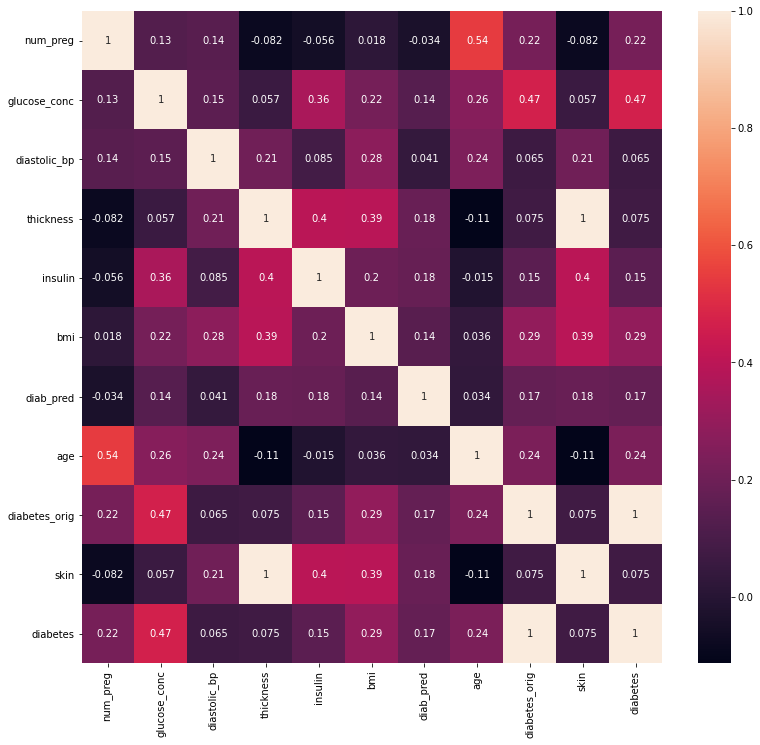

In [18]:
plt.figure(figsize=(13,12))
sns.heatmap(df.corr(),annot= True)

In [19]:
df = df.drop(columns=['thickness','diabetes_orig'],axis=1)

In [20]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,30.5,33.6,0.627,50,1.3790,1
1,1,85,66,30.5,26.6,0.351,31,1.1426,0
2,8,183,64,30.5,23.3,0.672,32,0.0000,1
3,1,89,66,94.0,28.1,0.167,21,0.9062,0
4,0,137,40,168.0,43.1,2.288,33,1.3790,1


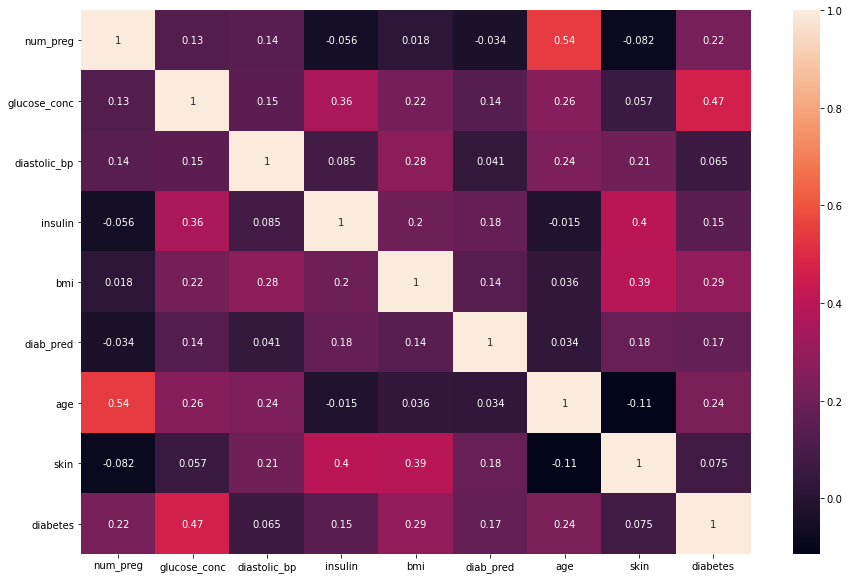

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
input_col = df.drop('diabetes',axis=1)

In [24]:
output_col = df['diabetes']

In [25]:
df.shape

(768, 9)

In [26]:
input_train, input_test, out_train, out_test = train_test_split(input_col, output_col,test_size = 0.2)

In [27]:
# logistic regression,
# naive bayes. 
# knn k nearest neighbours,
# svm -- support vector machine
# decision tree algorithm
# random forest algorithm -- ensemble algoritm


In [28]:
input_train.shape

(614, 8)

In [29]:
out_train.shape

(614,)

In [30]:
input_test.shape

(154, 8)

In [31]:
out_test.shape

(154,)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(input_train,out_train)

C:\Users\s_the_king\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = lr.predict(input_test)

In [36]:
predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,out_test)

0.8116883116883117

In [38]:
train_pred = lr.predict(input_train)
accuracy_score(train_pred,out_train)

0.7801302931596091

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(input_train,out_train)

GaussianNB()

In [40]:
pred_1 = nb.predict(input_test)
accuracy_score(pred_1,out_test)

0.8181818181818182

In [41]:
pred_2 = nb.predict(input_train)
accuracy_score(pred_2,out_train)

0.754071661237785

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [43]:
KNC = KNeighborsClassifier()
KNC.fit(input_train,out_train)

KNeighborsClassifier()

In [44]:
pred_3 = KNC.predict(input_test)
accuracy_score(pred_3,out_test)

0.7337662337662337

In [45]:
pred_4 = KNC.predict(input_train)
accuracy_score(pred_4,out_train)

0.8061889250814332

In [46]:
DCT = DecisionTreeClassifier()
DCT.fit(input_train,out_train)

DecisionTreeClassifier()

In [47]:
pred_5 = DCT.predict(input_test)
accuracy_score(pred_5,out_test)

0.7272727272727273

In [48]:
pred_6 = DCT.predict(input_train)
accuracy_score(pred_6,out_train)

1.0

In [49]:
Sv = SVC()
Sv.fit(input_train,out_train)

SVC()

In [50]:
pred_7 = Sv.predict(input_test)
accuracy_score(pred_7,out_test)

0.7792207792207793

In [51]:
pred_8 = DCT.predict(input_train)
accuracy_score(pred_8,out_train)

1.0

In [52]:
rfc = RandomForestClassifier()
rfc.fit(input_train,out_train)

RandomForestClassifier()

In [53]:
pred_9 = rfc.predict(input_test)
accuracy_score(pred_9,out_test)

0.7662337662337663

In [54]:
pred_10 = DCT.predict(input_train)
accuracy_score(pred_10,out_train)

1.0